#### _Speech Processing Labs 2020: Module 1_

In [1]:
## Run this first! 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import cmath
from math import floor
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.style.use('ggplot')

from dspMisc import *

# 5 Interpreting the  Discrete Fourier Transform

### Learning Outcomes
* Understand how sampling rate effects the DFT output
* Understand what the DFT leakage is.


### Need to know
* Topic Videos: Fourier Analysis, Frequency Domain
* [Digital Signals: Sampling sinusoids](./sp-m1-3-sampling-sinusoids.ipynb)
* [The Discrete Fourier Transform](./sp-m1-4-discrete-fourier-transform.ipynb) _(desirable)_

<div class="alert alert-warning">
<strong>Equation alert</strong>: If you're viewing this on github, please note that the equation rendering is not always perfect. You should view the notebooks through a jupyter notebook server for an accurate view.
</div>

## 5.1 A Very Quick DFT recap
The previous worksheet went through the mechanics of the Discrete Fourier Transform (DFT).  The DFT input and output are broadly: 

* **Input:**  $N$ amplitude samples over time 
    * $x[n]$, for $n=1..N$ (i.e. a time series of $N$ samples)
    
    
* **Output:** the dot product (i.e., the similiarity) between the input and $N$ sinusoids with different frequencies
    * DFT[k] $= Me^{j\phi}$, i.e. a complex number with **magnitude** $M$ and **phase** angle $\phi$

The outputs are calculated using the following formula for $k=0,...N-1$.   

$$ 
\begin{align}
DFT[k] &= \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi nk}{N}} \\
&= \sum_{n=0}^{N-1} x[n]\big[\cos\big(\frac{2\pi nk}{N} \big) - j \sin\big(\frac{2\pi nk}{N} \big) \big]
\end{align}
$$

We saw how the complex numbers in this equation $e^{-j2\pi nk/N}$ for $k=1...N-1$ represent sinusoids with specific frequencies as projections of phasors. You can just think of a phasor as an analogue clock with one hand (vector) ticking (rotating) around a clockface (i.e. a circle), where the length of the hand is the amplitude of that wave, and how fast it goes around the clock is it's frequency.

Each DFT[k] output essentially tells us how strongly the input is repeats itself (i.e. is periodic) at the frequency of the $k$th DFT phasor. So, we talk about the DFT outputs as providing a **frequency response**. 

Since the the DFT outputs are complex numbers, we can talk about them in terms of magnitude and phase angle: The magnitude of DFT[k] tells us how much we'd weight the $k$-th phasor if we were to try to reconstruct the original input by adding all the DFT phasors together.  The phase of DFT[k] tells use whether we need to shift that wave along the time axis. 

## 5.2 The DFT Frequency Response:  Which Frequencies?


You will have noticed in the previous worksheet that we only talked about relative frequencies above, e.g. the $e^{-j2\pi nk/N}$ phasor has $k$ times the frequency of the $e^{-j2\pi n/N}$ phasor.  



Since the frequencies of the DFT phasors are all multiples of the $k=1$ phasor, we just have to figure out the frequency of that phasor and we'll know all the rest. Now, the $k=1$ phasor takes $N$ steps to complete a full cycle of the unit circle.  So, it's frequency depends on how long each of these steps takes.  That is, the **sampling rate**.  

Assume we are sampling at a rate of $f_s$ samples per second. Then, we can calculate: 

* How long between each sample (i.e. the **sampling time**): 
    * $t_s = 1/f_s$  (seconds)


* How long does it take to take $N$ samples?
    * $t_s \times N$  (seconds x samples = seconds)
  
  
* How long will it take the $k=1$ phasor to make 1 complete cycle?
    * $T_1 = t_s \times N$  (seconds)
    * This is the **period** or **wavelength** of the phasor
 
 
* What is the **frequency** of the $k=1$ phasor? 
    * $f_{min} = 1/T_1 = 1/(t_s N) $ (cycles/second)
 
 
* What is the **frequency** of the $k$th phasor? 
    * $kf_{min}$ (cycles/second)
    



So, the important thing to remember is that the DFT outputs depend on: 

* The **number of samples** in the input sequence, $N$
* The **sampling rate**, $f_s$ samples/second 


### Example
Assume we have a sampling rate of $f_s = 32$ samples/second, and an input length of $N=16$. 

We can then calculate the $k=1$ DFT output frequency by noting the following: 

* The sampling time is: $t_s = 1/f_s = 1/32$ seconds
* So, the time it takes to complete one cycle is: $T_1 = t_sN = 1/32 \times 16 = 1/2$ seconds
* So, the frequency of DFT[1] is $f_{min} = 1/1/2 = 2$ cycles/second

### Exercise

* What's the frequency of the $k=5$ phasor in the previous example?


### Notes

$kf_{min} = (5)(2) = 10$ cycles per second

### Exercise

Try running this code which sets the input to be a sine wave with the same frequency as the the 1st DFT component. That is, `f_in = 1/wavlen_in`.   


f_s: 128.000000
t_s: 0.007812
wavlen: 0.500000
f_in 2.000000
samples per cycle 64.000000


Text(0.5, 1.0, 'Input: $x[n]$ in the time domain')

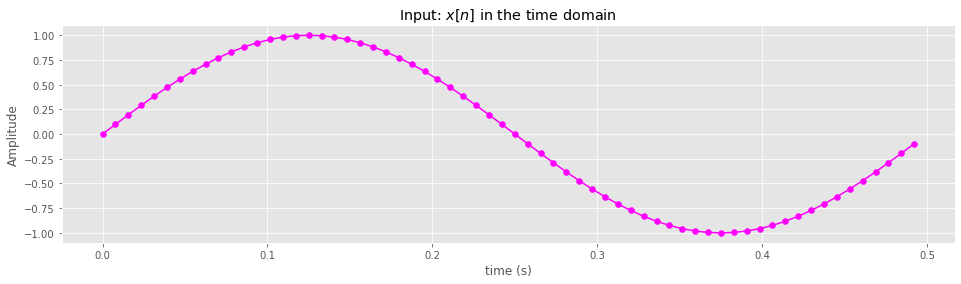

In [2]:
N=64

#sampling rate: 
f_s = 128

## sample time
t_s = 1/f_s

## Notice that the DFT component frequencies as completely determined by the number of samples N
## and the sampling frequency f_s.
## So if we wanted the input frequency to exactly match the frequency of the 1st DFT component we
## could just do this:

wavlen_in = t_s*N
f_in = 1/wavlen_in

print("f_s: %f\nt_s: %f\nwavlen: %f\nf_in %f" % (f_s, t_s, wavlen_in, f_in))

## indices of input sequence of size N
nsteps = np.array(range(N))

samples_per_cycle = wavlen_in/t_s
print("samples per cycle %f" % samples_per_cycle)

## Generate a sine wave with f_in matching the frequency of the k=1 DFT phasor
## You can look at the code for this function in the file XXX.py

x, time_steps = gen_sinusoid(frequency=f_in, phase=0, amplitude=1, sample_rate=f_s, seq_length=N, gen_function=np.sin)


## Plot the input
fig, timedom = plt.subplots(figsize=(16, 4))
timedom.scatter(time_steps, x, color='magenta')
timedom.plot(time_steps, x, color='magenta')
timedom.set_xlabel("time (s)")
timedom.set_ylabel("Amplitude")
timedom.set_title("Input: $x[n]$ in the time domain")

In [3]:
## Calculate the frequencies associated with each DFT output
def get_dft_freqs_all(sample_rate, seq_len):
    ## Get the minimum frequency
    f_min = sample_rate/seq_len
    
    ## All the other frequencies are just integer multiples of the minimum frequency
    ## We have 0,...,seq_len-1 outputs
    dft_outs = np.arange(seq_len)
    
    return f_min * dft_outs

In [4]:
## Find the DFT output frequencies for our current sample rate and input length
dft_freqs = get_dft_freqs_all(sample_rate=f_s, seq_len=N)
print(dft_freqs)


[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126.]


Text(0.5, 1.0, 'Phase response')

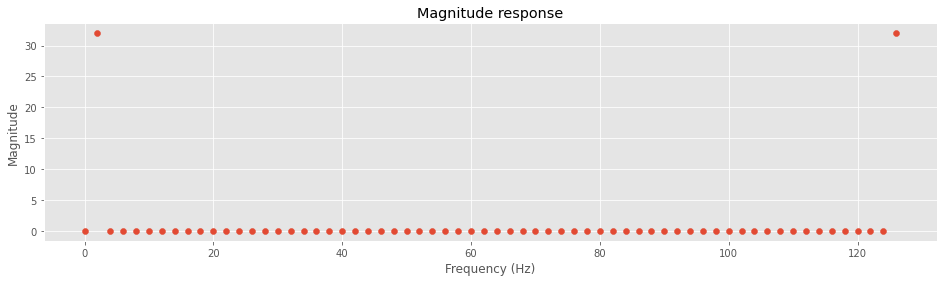

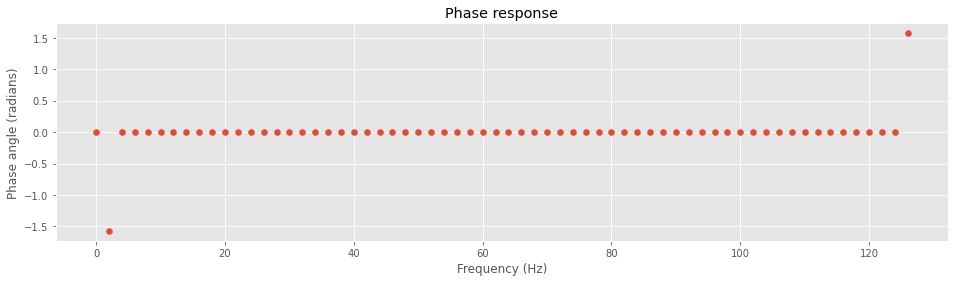

In [5]:
## Apply the DFT to the input and return the magnitudes and phases for each DFT output
mags, phases = get_dft_mag_phase(x, seq_len=N)

## Plot the magnitudes
fig, fdom = plt.subplots(figsize=(16, 4))
fdom.scatter(dft_freqs, mags)
fdom.set_xlabel("Frequency (Hz)")
fdom.set_ylabel("Magnitude")
fdom.set_title("Magnitude response")


#print(mags)

## Plot the phases
fig, fdom = plt.subplots(figsize=(16, 4))
fdom.scatter(dft_freqs, phases)
fdom.set_xlabel("Frequency (Hz)")
fdom.set_ylabel("Phase angle (radians)")
fdom.set_title("Phase response")




#print(phases)


### Exercise

* Is the output what you'd expect given the input? 
* Why is the phase non-zero for the DFT output's 1 and 63? 
* What happens if you change the `amplitude` of the input sine wave? What about the `phase`? 
* What happens to the range of DFT output frequencies if you increase the sampling rate `f_s` but keep the input sequence length `N` fixed? 
* What happens to the range of DFT output frequencies for $k > N/2$? Can the DFT actually model those frequencies? 

### Notes

## 5.3 DFT on a compound waveform

Now, let's see what happens when we use a compound waverform as input to the DFT.  First we need to set the length of the sequence and the sample rate. 

In [6]:
## Set the number of samples N, sampling rate f_s
N=64

#sampling rate: 
f_s = 64

## sample time
t_s = 1/f_s

print("N: %d\nf_s: %f\nt_s: %f" % (N, f_s, t_s))

N: 64
f_s: 64.000000
t_s: 0.015625


Let's create a compound waveform as input with frequency components of 4Hz and 12Hz:

Text(0.5, 1.0, 'A compound waveform: $x_compound$ in the time domain')

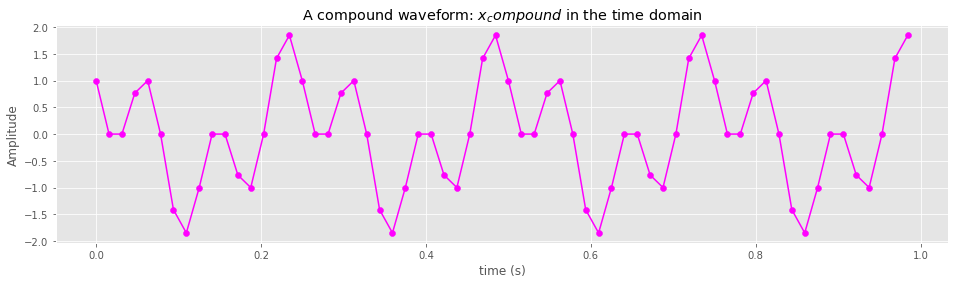

In [7]:
## Now let's create a compound waveform as input
## We're setting gen_function=np.cos, meaning that each of our sinusoids is a cosine wave 
x1, time_steps = gen_sinusoid(frequency=4, phase=0, amplitude=1, sample_rate=f_s, seq_length=N, gen_function=np.cos)

## Let's shift the phase of this one by 90 degrees (pi/2 rads)
x2, time_steps = gen_sinusoid(frequency=12, phase=np.pi/2, amplitude=1, sample_rate=f_s, seq_length=N, gen_function=np.cos)


x_compound = x1 + x2

## Plot the input
fig, timedom = plt.subplots(figsize=(16, 4))
timedom.scatter(time_steps, x_compound, color='magenta')
timedom.plot(time_steps, x_compound, color='magenta')
timedom.set_xlabel("time (s)")
timedom.set_ylabel("Amplitude")
timedom.set_title("A compound waveform: $x_compound$ in the time domain")

You should see a somewhat complicated waveform whose overall pattern repeats 4 times in a second.  Now we do the DFT and look at the magnitude and phase values for the different DFT outputs.  

Text(0.5, 1.0, 'Phase response')

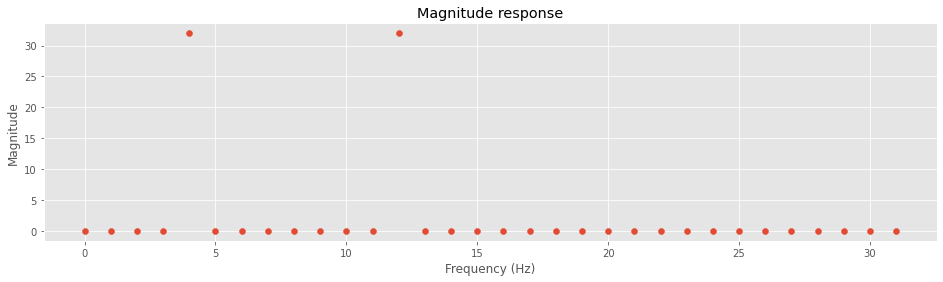

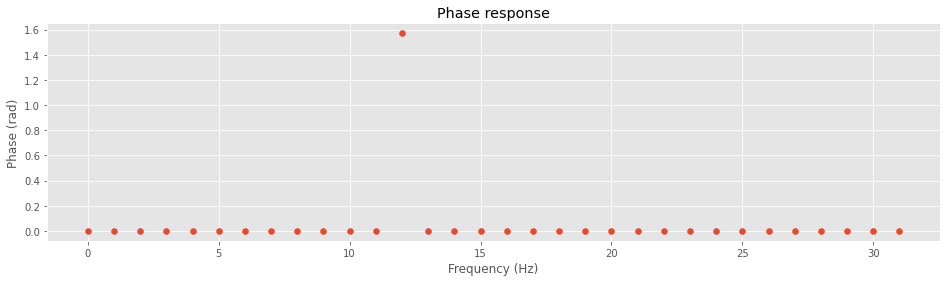

In [8]:
## Do the DFT on the compound waveform as above: 
mags, phases = get_dft_mag_phase(x_compound, seq_len=N)
dft_freqs = get_dft_freqs_all(sample_rate=f_s, seq_len=N)

## Plot the magnitudes
fig, fdom = plt.subplots(figsize=(16, 4))
#timedom.scatter(dft_freqs[:round(N)], mags[:round(N)])
fdom.scatter(dft_freqs[:round(N/2)], mags[:round(N/2)])
fdom.set_xlabel("Frequency (Hz)")
fdom.set_ylabel("Magnitude")
fdom.set_title("Magnitude response")
#print(mags)

## Plot the phases - let's just skip this for the moment 
fig, fdom = plt.subplots(figsize=(16, 4))
fdom.scatter(dft_freqs[:round(N/2)], phases[:round(N/2)])
fdom.set_xlabel("Frequency (Hz)")
fdom.set_ylabel("Phase (rad)")
fdom.set_title("Phase response")
#print(phases)


### Exercise

* Do you see what you would expect given the input? 
* Why does the number of non-zero phases differ from the number of non-zero magnitudes?


### Notes


### Exercise 

Explore the outputs of the DFT when you change the following parameters
* sampling rate `f_s`
* sequence length `N`
* frequency of the input sequence(s) `frequency` (in the function `gen_sinusoid`)


**Question**
* What happens if you set the frequency of one of the input components to be greater than the Nyquist frequency? 
* What happens when the frequency of the input components doesn't match any of the DFT component frequencies? 
(e.g. for the example above what if one of the input frequencies is not a whole number?) 




### Notes

## 5.4  Leakage

One of the main things to remember about the DFT is that you're calculating the correlation between the input and phasors with specific frequencies.  If your input exactly matches one of those phasor frequencies the magnitude response will show a positive magnitude for that phasor and zero for everything else.  However, if the input frequency falls between phasor frequencies (i.e. doesn't correspond to a specific DFT output), then you'll see spectral **leakage**.  The DFT outputs close to the input frequency will also get positive magnitudes, with the DFT output closest to the input frequency getting the highest magnitude. 

The following code gives an example


Text(0.5, 1.0, 'Leakage example (time domain)')

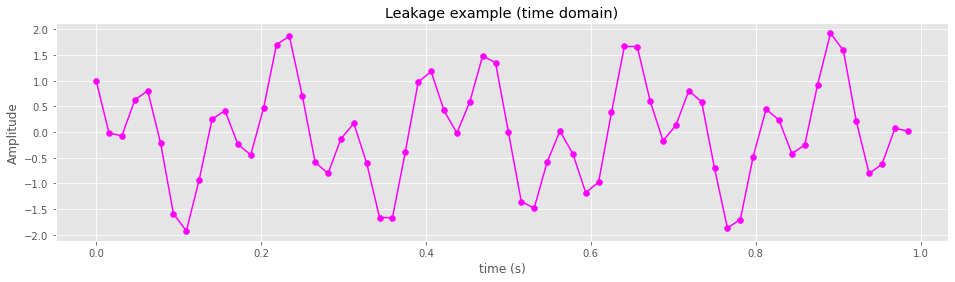

In [9]:
N=64
f_s = 64
f_in1 = 4.5 ## In between DFT output frequencies
f_in2 = 12  ## One of the DFT outputs

x1, time_steps = gen_sinusoid(frequency=f_in1, phase=0, amplitude=1, sample_rate=f_s, seq_length=N, gen_function=np.cos)
x2, time_steps = gen_sinusoid(frequency=f_in2, phase=np.pi/2, amplitude=1, sample_rate=f_s, seq_length=N, gen_function=np.cos)
x_compound = x1  + x2

## Plot the input
fig, timedom = plt.subplots(figsize=(16, 4))
timedom.scatter(time_steps, x_compound, color='magenta')
timedom.plot(time_steps, x_compound, color='magenta')
timedom.set_xlabel("time (s)")
timedom.set_ylabel("Amplitude")
timedom.set_title("Leakage example (time domain)")



Text(0.5, 1.0, 'Leakage example: Magnitude response')

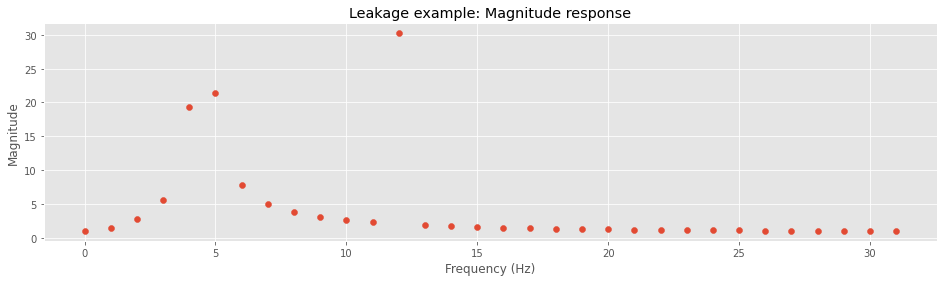

In [10]:
## Do the DFT on the compound waveform as above: 
mags, phases = get_dft_mag_phase(x_compound, seq_len=N)
dft_freqs = get_dft_freqs_all(sample_rate=f_s, seq_len=N)

## Plot the magnitudes
fig, fdom = plt.subplots(figsize=(16, 4))

## Just plot the first N/2 frequencies since we know that they are the mirrored for k>N/2
fdom.scatter(dft_freqs[:round(N/2)], mags[:round(N/2)])
fdom.set_xlabel("Frequency (Hz)")
fdom.set_ylabel("Magnitude")
fdom.set_title("Leakage example: Magnitude response")
#print(mags)



### Leakage as the normalized sinc function 

Leakage makes the DFT harder to interpret. However, we can derive the shape that leakage will have from the the DFT equation and some algebra about rectangular functions.  It turns out that leakage for a particular frequency follows the normalized **sinc** function: 

$$
\begin{align}
X(m) &= \Big|\frac{AN}{2} \cdot \mathop{sinc}(c-m)\Big|\\
&= \Big|\frac{AN}{2} \cdot \frac{\sin(\pi(c-m))}{2\pi(c-m))}\Big|\\
\end{align}
$$

Where $A$ is the peak amplitude of the input, $N$ is the input sequence length, $c$ is the number of cycles completed in the input sequence time.  If $c$ is a whole number we just get the usual DFT response, but if $c$ is not a whole number, we get a spread across output frequency bins.


Let's check whether the sinc function matches what we get in the DFT. First we write a function to evaluate the leakage function in between our DFT outputs.

In [11]:
## Calculate the approximated leakage as the sinc function
def calc_leakage(freq,  sample_rate, seqlen, amplitude=1):
    sequence_time = (1/sample_rate)*seqlen
   
    ## number of cycles in input for component
    c = freq * sequence_time
    print("c=", c)
    
    ## Interpolate between DFT ouput indices
    ms = np.arange(0, seqlen, 0.05)
    
    ## Approximated response - we could actually just return a function here, but 
    ## let's just keep things concrete for now.
    leakage = np.abs(amplitude * seqlen * 0.5 * np.sinc((c-ms)))

    return leakage, ms * (sample_rate/seqlen)




Now let's plot the leakage predicted for our two input components separately (top) and added together (bottom)

c= 4.5
c= 12.0


Text(0.5, 1.0, 'Sum of leakage functions for input components')

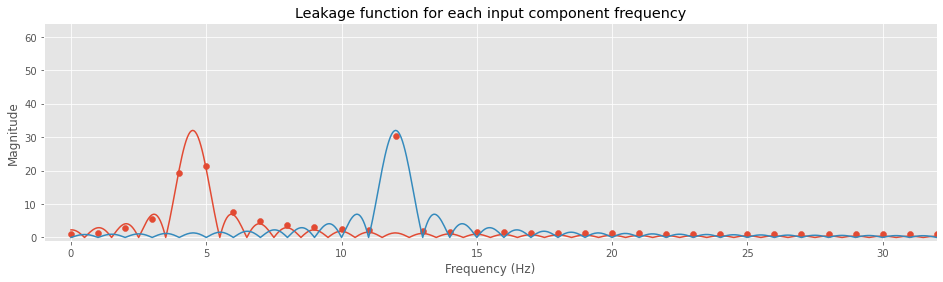

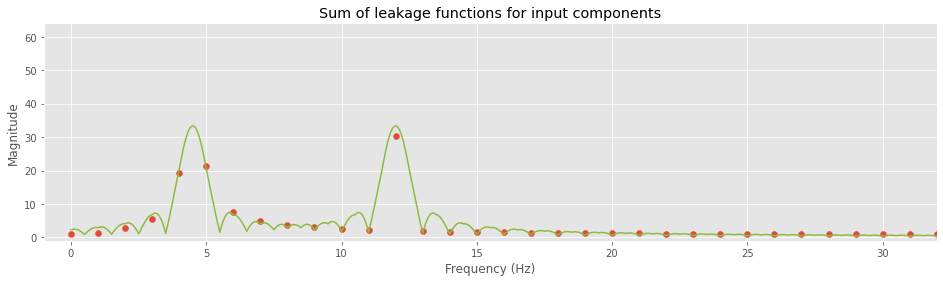

In [12]:
## Calculate the leakage function for our know input wave components
leakage1, ms = calc_leakage(f_in1, f_s, N)
leakage2, ms = calc_leakage(f_in2, f_s, N)


## Plot the magnitude response and the leakage function for each of our input components
fig, fdom = plt.subplots(figsize=(16, 4))
fdom.set(xlim=(-1, N/2), ylim=(-1, N))
fdom.scatter(dft_freqs, mags)


fdom.plot(ms, leakage1)
fdom.plot(ms, leakage2)
fdom.set_xlabel("Frequency (Hz)")
fdom.set_ylabel("Magnitude")
fdom.set_title("Leakage function for each input component frequency")

## Plot the magnitude response and the sum of the leakage functions
fig, fdom = plt.subplots(figsize=(16, 4))
fdom.set(xlim=(-1, N/2), ylim=(-1, N))
fdom.scatter(dft_freqs, mags)
fdom.plot(ms, leakage1 + leakage2, color='C5')
fdom.set_xlabel("Frequency (Hz)")
fdom.set_ylabel("Magnitude")
fdom.set_title("Sum of leakage functions for input components")

## It fits, though not perfectly!

In the top figure, you should see that peaks (**main lobes**) of each leakage function are aligned with our input component frequencies. The peaks are at the same points as the DFT outputs when the sinusoidal component has a frequency matching the DFT output frequency (i.e. 12 above Hz).  Otherwise we see the spread of leakage around the input component frequency (i.e. around 4.5 Hz).  

You'll also notice that our DFT magnitudes points don't always line up perfectly with our sinc curves.  Part of this is because the leakage function is an _approximation_.  Nevertheless, it's a very good approximation! 

### Exercise

* What happens if the frequencies of the two components making the compound waveform are very close together? 
    * e.g. make `f_in2=6`
* What if one of the components has a relatively small amplitude? 
    * e.g. change `amplitude` of the second input to 0.4

### Notes

### Shaping the lobes
The leakage sinc function has a peak around a specific frequency. If we want our DFT to be better able to distinguish between close frequencies, we need that peak, the **main lobe** to be narrower.  We also want the other peaks, the **side lobes** to be flatter.  We can achieve this using different **windowing methods** on our input.  This is why you see 'Hanning' as the default option for window method in the advanced spectrogram settings in praat.  

We'll see some more examples of this when we look at different types of filters later.  But for now the main thing to observe is that leakage might give you the impression that specific frequency components are present in your waveform, when what's actually happening is that your waveform has frequencies that don't match the DFT phasors.  Another thing that can happen is that the peak for a low amplitude component gets subsumed into the main lobe of a nearby frequency component.  This might make you miss frequency components in your input! 

## 5.6 Extra: 

Here's the composition and decomposition for the compound waveform one you saw in Notebook 2! 

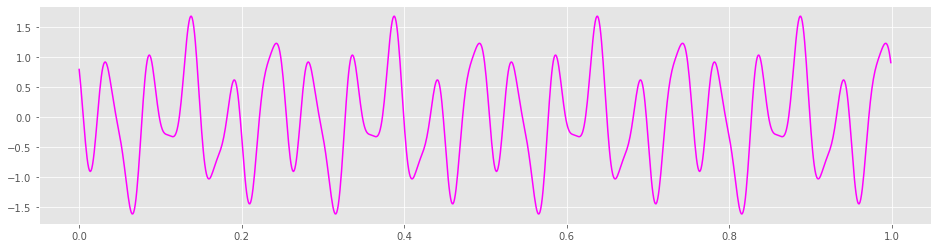

In [13]:
N=1028
f_s = 1028
f_in1 = 8 ## In between DFT output frequencies
f_in2 = 20  ## One of the DFT outputs
f_in3 = 36  ## One of the DFT outputs


x1, time_steps = gen_sinusoid(frequency=f_in1, phase=0, amplitude=0.5, sample_rate=f_s, seq_length=N, gen_function=np.cos)
x2, time_steps = gen_sinusoid(frequency=f_in2, phase=np.pi/2, amplitude=1, sample_rate=f_s, seq_length=N, gen_function=np.cos)
x3, time_steps = gen_sinusoid(frequency=f_in3, phase=0, amplitude=0.3, sample_rate=f_s, seq_length=N, gen_function=np.cos)


x_compound = x1  + x2 + x3

## Plot the input
fig, timedom = plt.subplots(figsize=(16, 4))
#timedom.scatter(time_steps, x_compound, color='magenta')
#timedom.set(xlim=(0, 0.2))
timedom.plot(time_steps, x_compound, color='magenta')

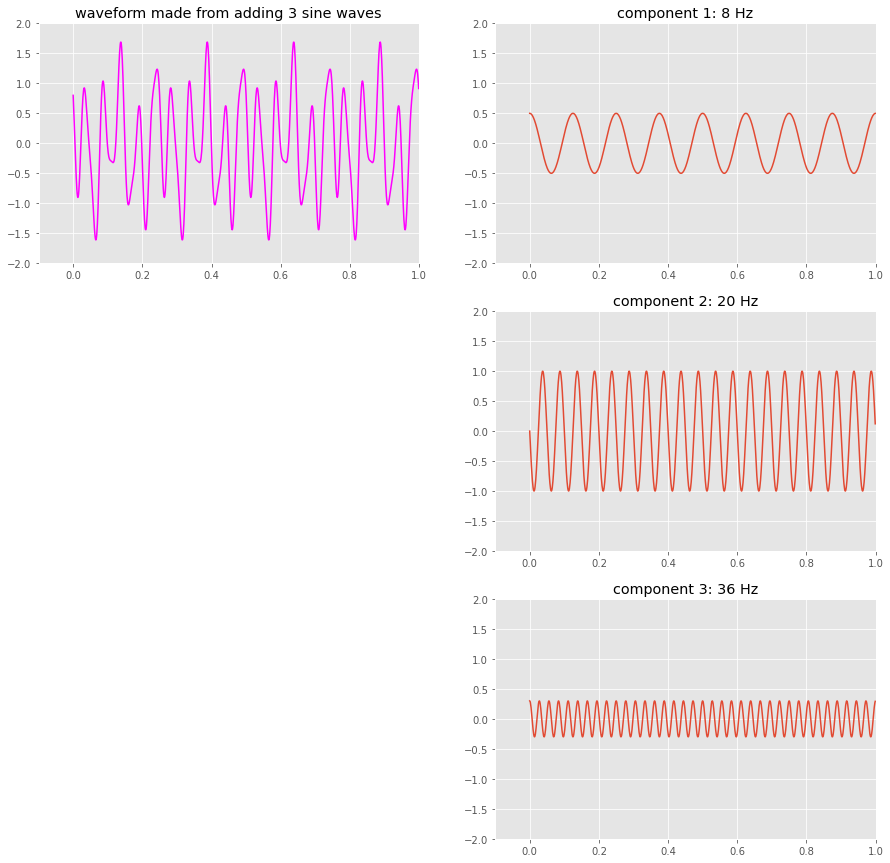

In [14]:
## Plot the input

fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(3,2)

ymax=2
timedom = fig.add_subplot(gs[0, 0])
timedom.set(xlim=(-0.1, 1), ylim=(-ymax,ymax))
timedom.plot(time_steps, x_compound, color='magenta')
timedom.set_title("waveform made from adding 3 sine waves")



s1 = fig.add_subplot(gs[0, 1])
s1.set(xlim=(-0.1, 1), ylim=(-ymax,ymax))
s1.plot(time_steps, x1)
s1.set_title("component 1: 8 Hz")

s2 = fig.add_subplot(gs[1, 1])
s2.set(xlim=(-0.1, 1), ylim=(-ymax,ymax))
s2.plot(time_steps, x2)
s2.set_title("component 2: 20 Hz")



s3 = fig.add_subplot(gs[2, 1])
s3.set(xlim=(-0.1, 1), ylim=(-ymax,ymax))
s3.plot(time_steps, x3)
s3.set_title("component 3: 36 Hz")


fig.savefig("./fig/compound_waveform.png")

Text(0.5, 1.0, 'Magnitude Response')

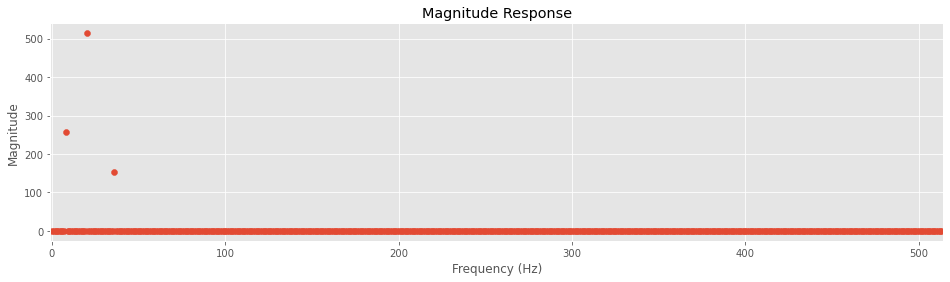

In [15]:
## Do the DFT on the compound waveform as above: 
mags, phases = get_dft_mag_phase(x_compound, seq_len=N)
dft_freqs = get_dft_freqs_all(sample_rate=f_s, seq_len=N)

## Plot the magnitudes
fig,fdom = plt.subplots(figsize=(16, 4))
fdom.set(xlim=(-1, N/2))
## Just plot the first N/2 frequencies since we know that they are the mirrored for k>N/2
fdom.scatter(dft_freqs[:round(N/2)], mags[:round(N/2)])
fdom.set_xlabel("Frequency (Hz)")
fdom.set_ylabel("Magnitude")
fdom.set_title("Magnitude Response")
#print(mags)

